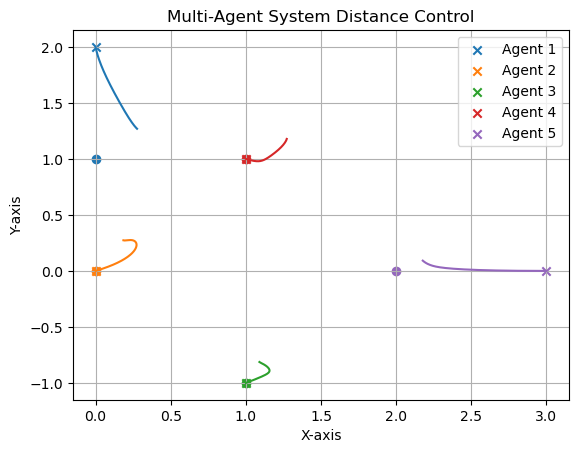

In [8]:
from numpy.core .numeric import full
from scipy.integrate import odeint
from numpy import linalg as la
import numpy as np
import matplotlib. pyplot as plt

# Function for distance control
def MAS_distance(p, t, N, p_des, p_dim=2):
    dpdt = np.zeros([len(N), p_dim])  # Initialize derivative of positions
    p_vec = np.array(p).reshape(-1, 2)  # Current positions
    p_des_vec = np.array(p_des).reshape(-1, 2)  # Desired positions

    for i in range(len(N)):
        err_diff = []
        for j in N[i]:
            # Error between current and desired distances
            tilde_err = (
                np.sum(np.square(p_vec[j] - p_vec[i])) -
                np.sum(np.square(p_des_vec[j] - p_des_vec[i]))
            )
            # Add to error difference
            err_diff.append(tilde_err * (p_vec[j] - p_vec[i]))
        dpdt[i] = np.sum(err_diff, axis=0) if err_diff != [] else np.array([0.0, 0.0])
    return dpdt.reshape(-1)

## Setup and run
# Neighbor relationships (adjusted for Python's 0-based index)
N = [[2, 4], [1, 3, 4, 5], [2, 5], [1, 2, 5], [2, 3, 4]]
N = [[x - 1 for x in y] for y in N]

# Initial positions of agents
p0 = np.array([[0, 2], [0, 0], [1, -1], [1, 1], [3, 0]])
p_size = np.size(p0[0])

# Desired positions of agents
des_p = np.array([[0, 1], [0, 0], [1, -1], [1, 1], [2, 0]])

# Time range for simulation
t = np.arange(0, 10, 0.001)

# Solve the differential equation
p = odeint(MAS_distance, p0.reshape(-1), t, args=(N, des_p, p_size)).reshape(-1, len(p0), p_size)

# Plotting results
for i in range(len(p0)):
    plt.plot(p[:, i, 0], p[:, i, 1])  # Plot trajectory of each agent
    plt.scatter(p0[i, 0], p0[i, 1], marker='x', label=f'Agent {i+1}')  # Initial positions
    c = plt.gca().lines[-1].get_color()  # Get the color of the line
    plt.scatter(des_p[i, 0], des_p[i, 1], color=c, marker='o')  # Desired positions

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multi-Agent System Distance Control')
plt.legend()
plt.grid()
plt.show()